In [88]:

# %%


import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

Import dataset using Pandas

In [69]:
path = '/Users/stephen/Flatiron/Phase3/NYC_Bike_Collisions/Data/NYC_Motor_Collisions.csv'
og_df = pd.read_csv(path)

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Pandas is returning an error saying Column 3 has mixed object types. 

In [70]:
# investigating the 3rd column 
df.columns[3]

'ZIP CODE'

In [71]:
df['ZIP CODE'].unique

<bound method Series.unique of 0              NaN
1         11217.00
2              NaN
3         11222.00
4              NaN
            ...   
1832439      10035
1832440      11102
1832441      11236
1832442        NaN
1832443      11367
Name: ZIP CODE, Length: 1832444, dtype: object>

So we can see that the "ZIP CODE" column was causing an error so we'll create a new dataframe with the values in the "ZIP CODE" column converted to strings.

In [106]:
df = pd.read_csv(path, dtype={"ZIP Code": str})

In [107]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [108]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,nan,nan,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.00,40.68,-73.98,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,nan,nan,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.00,nan,nan,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00,0.00,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [109]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1616415.00,1616415.00,1832426.00,1832413.00,1832444.00,1832444.00,1832444.00,1832444.00,1832444.00,1832444.00,1832444.00
mean,40.67,-73.83,0.28,0.00,0.05,0.00,0.02,0.00,0.20,0.00,2969893.19
std,1.45,2.83,0.68,0.04,0.23,0.03,0.15,0.01,0.64,0.03,1502579.14
min,0.00,-201.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,40.67,-73.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2965677.75
50%,40.72,-73.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3552400.50
75%,40.77,-73.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4010755.25
max,43.34,0.00,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00,4469351.00


lets take a look at our target varriable "NUMBER OF PERSONS KILLED"

In [110]:
df['NUMBER OF PERSONS KILLED'].value_counts(dropna=False)

0.00    1830097
1.00       2245
2.00         57
nan          31
3.00          9
4.00          3
8.00          1
5.00          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

<AxesSubplot:>

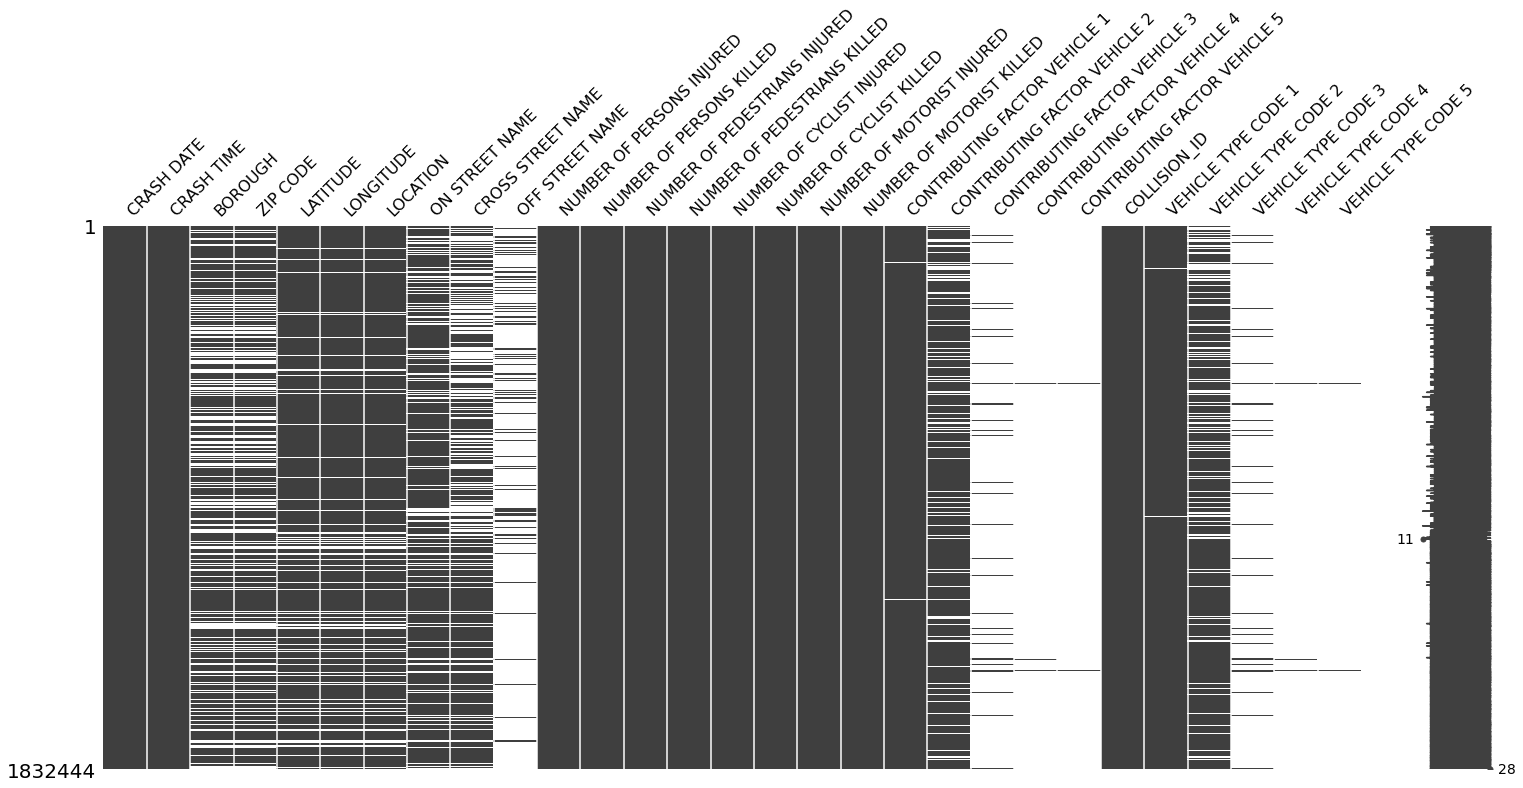

In [111]:
msno.matrix(df)

<AxesSubplot:>

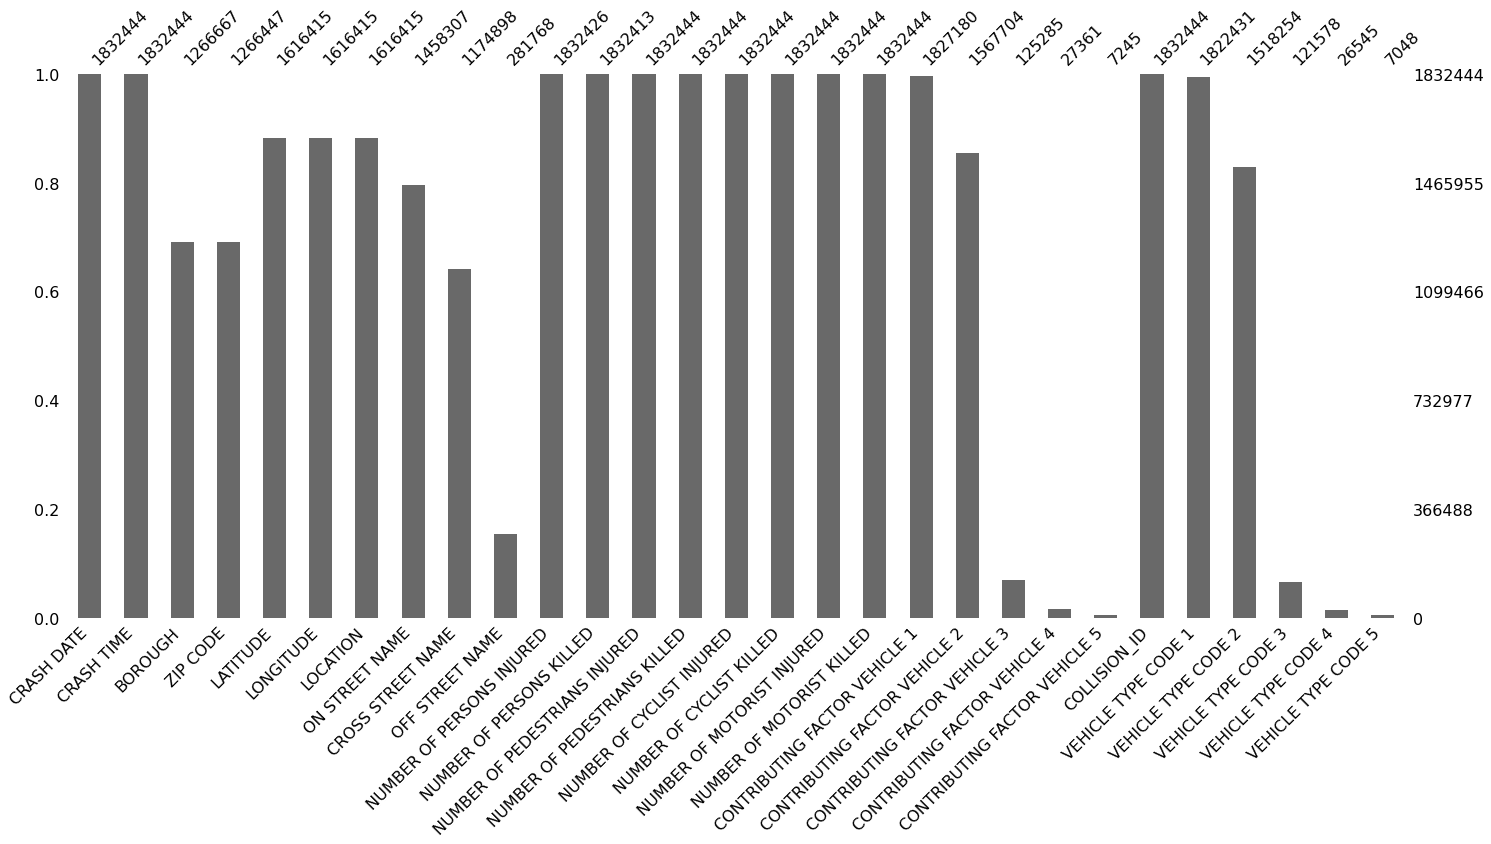

In [92]:
msno.bar(df)

drop rows with missing values 

In [112]:
df = df.dropna(subset=['LOCATION', 'BOROUGH'])

In [114]:
df.shape

(1232582, 29)

<AxesSubplot:>

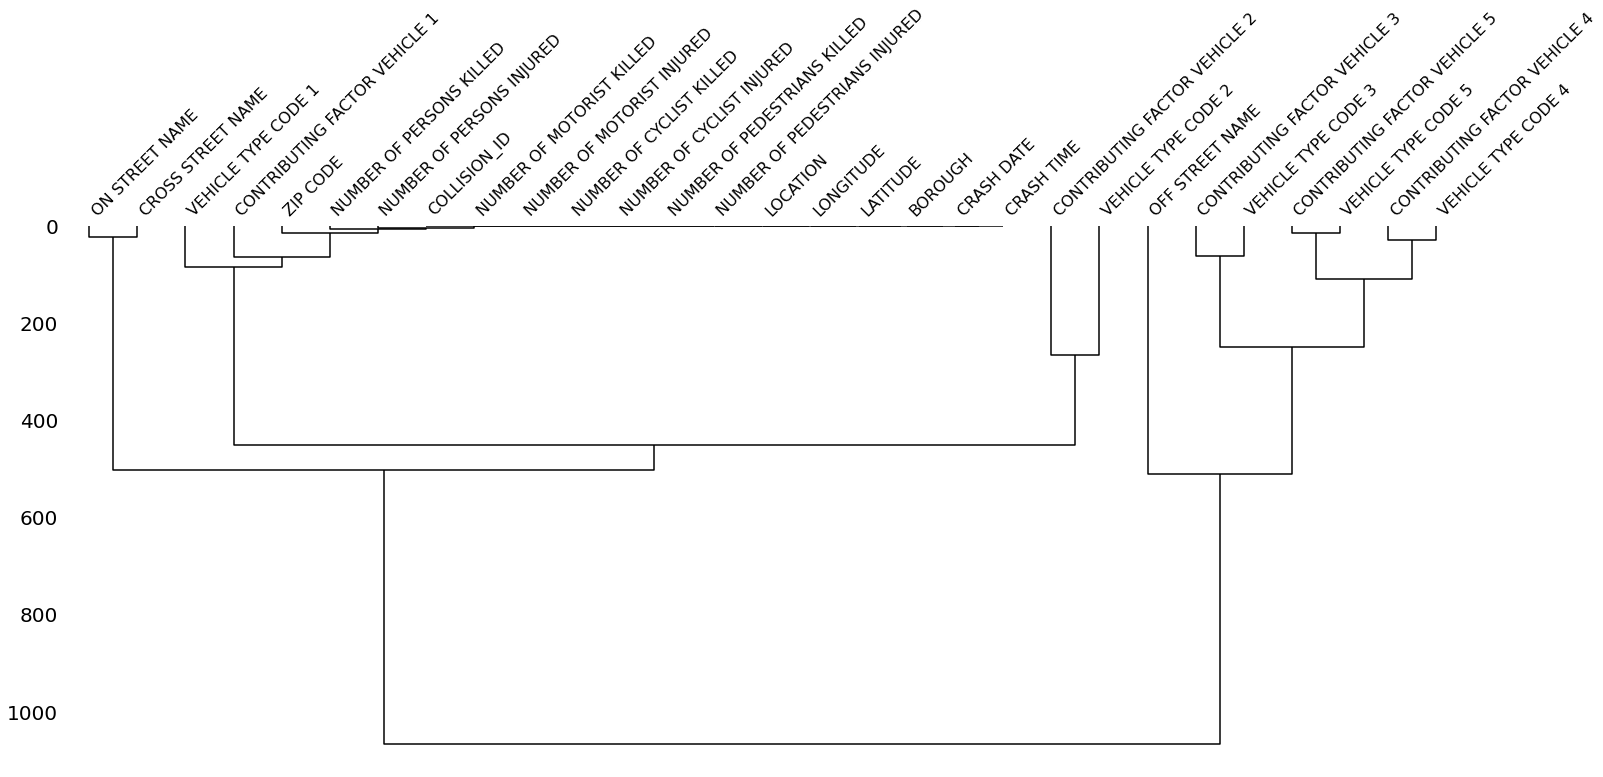

In [122]:
msno.dendrogram(df)